In [20]:
import sys 
sys.path.append('..')

from models import PavageDIF, SoftmaxWeight, LocationScaleFlow
from targets import Target
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


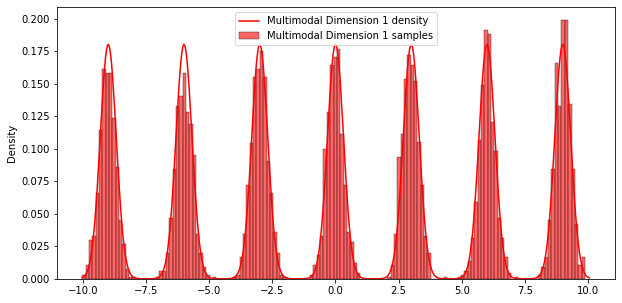

In [5]:
example = "Multimodal Dimension 1"
num_samples = 10000
target = Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:47<00:00,  1.54it/s, loss = 2.2352664470672607]


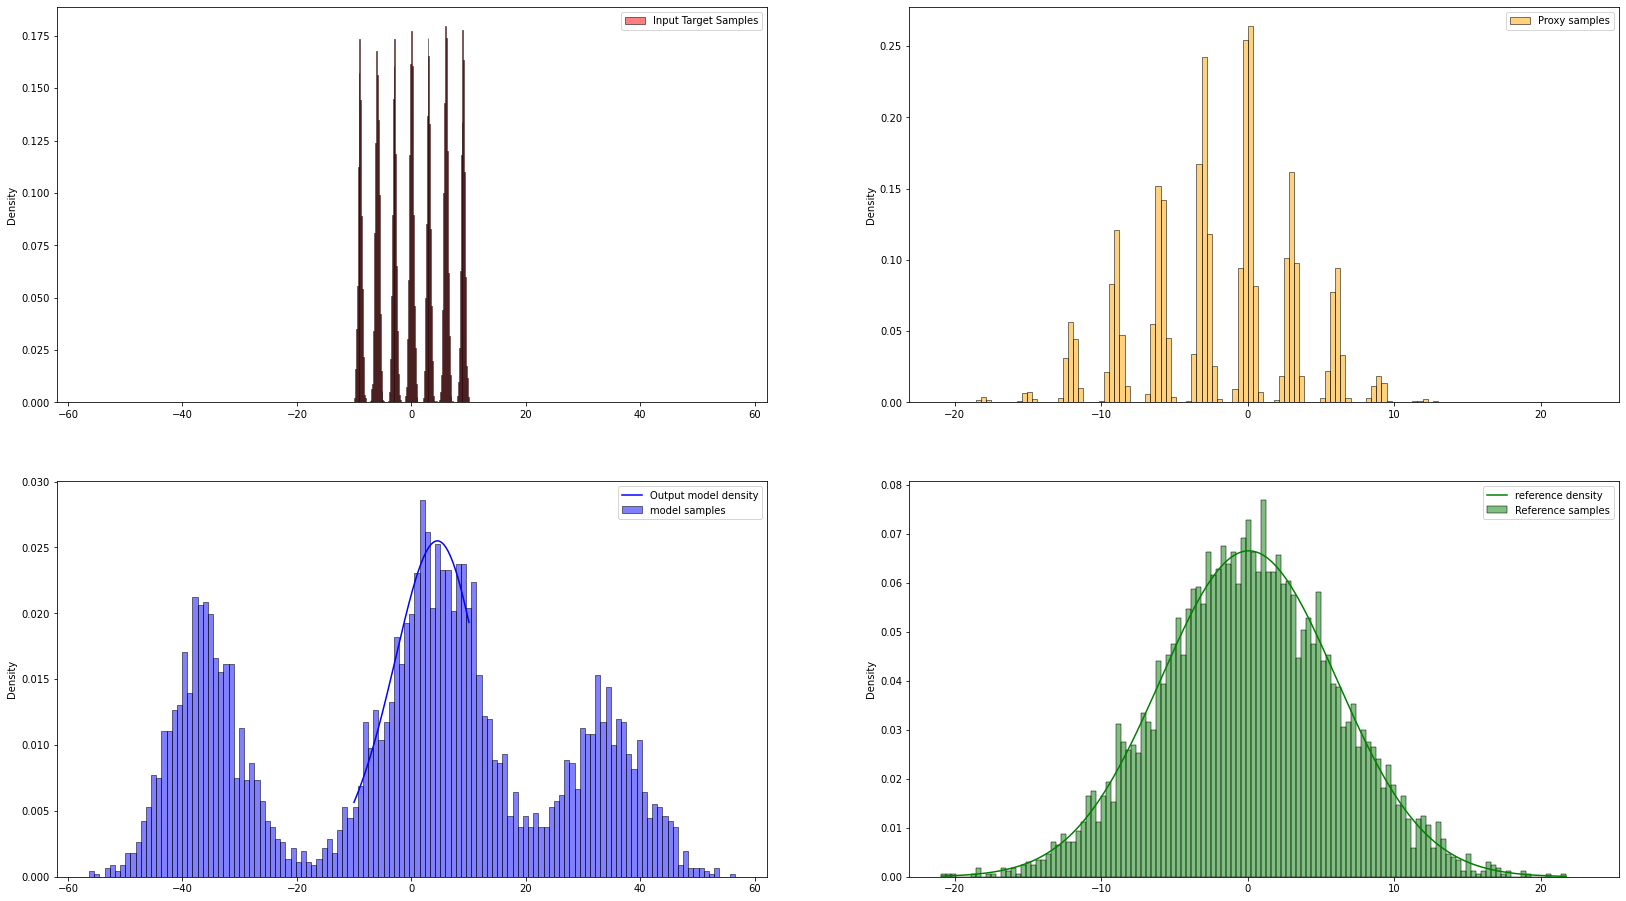

In [23]:
K=15
initial_w = SoftmaxWeight(K, p, [256,256,256],mode = 'Constant')
initial_log_s = torch.zeros(K,p)
initial_m = torch.tensor([[9.],[-9.],[6.],[-6.],[3.],[-3.],[0.],[39.],[-39.],[36.],[-36.],[33.],[-33.],[30.],[-30.]])
T = LocationScaleFlow(K, p, fixed_m = initial_m, initial_log_s = initial_log_s)
dif = PavageDIF(target_samples,K, initial_w= initial_w, initial_T = T)
dif.model_visual()
loss_values = dif.train(1000,50,visual=False)